## Credit Default Prediction Using Supervised Machine Learning Algorithms
 
---

### Project Overview

Credit scorecards are a pivotal tool within the financial sector, serving as a mechanism for managing risk. They leverage the personal data provided by credit card applicants to forecast the likelihood of future payment defaults. Based on this predictive analysis, banks make informed decisions on whether to grant or deny a credit card application.

### Project Objective
The primary objective of this project is to develop a machine learning model that predicts credit card payment defaults accurately. By leveraging various supervised machine learning algorithms, we aim to assist financial institutions in assessing the creditworthiness of applicants more effectively.

**Dataset Features Description**

The table below details each attribute of the dataset used in evaluating credit card applications:

| Feature Name         | Explanation                       | Additional Remarks                                   |
|----------------------|-----------------------------------|------------------------------------------------------|
| ID                   | Unique Identifier for each client |                                                      |
| Income               | Annual income of the application  |                                                      |
| Gender               | Applicant's Gender                | Male = 0, Female = 1                                 |
| Car                  | Car Ownership                     | Yes = 1, No = 0                                      |
| Children             | Number of Children                |                                                      |
| Real Estate          | Real Estate Ownership             | Yes = 1, No = 0                                      |
| Days Since Birth     | Number of Days                    | Count backwards from current day (0), -1 means yesterday |
| Days Employed        | Number of Days                    | Count backwards from current day(0). If positive, it means the person is currently unemployed. |
| Payment Default      | Overdue credit card payments      | Yes = 1, No = 0                                      |


---


### 1. Data Cleaning and Anomoly Correction


**Importing Necessary Libraries**

In [19]:
# Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scikit-Learn for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Ignore DeprecationWarning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

**Loading the Dataset**

In [20]:
# Load data from an Excel file into a DataFrame
credit_risk_df = pd.read_excel('/Users/rashrav/Documents/GitHub/Data Analytics Portfolio Projects/Python Projects/data/credit_risk_profile.xlsx')

**Removing Duplicate Entries**

In [21]:
# Remove duplicate entries based on the 'ID' column
credit_risk_df.drop_duplicates(subset='ID', inplace=True)

**Dropping Unnecessary Columns**

In [22]:
# Drop the 'ID' column as it's no longer needed after removing duplicates
credit_risk_df.drop('ID', axis=1, inplace=True)

**Resetting DataFrame Index**

In [23]:
# Reset the DataFrame index to maintain consistency after row deletions
credit_risk_df.reset_index(drop=True, inplace=True)

**Handling 'Days Employed'**

In [24]:
# Set 'Days Employed' to 0 for rows with positive values
# This is under the assumption that positive values are incorrect and should be treated as 0 (indicating current unemployment)
credit_risk_df.loc[credit_risk_df['Days Employed'] > 0, 'Days Employed'] = 0

### 2. Feature Transformation and DataFrame Reorganization

**Creating Variables for Age and Years in Employment field and applying transformation**

In [25]:
# Applying transformations
Age = abs(credit_risk_df['Days Since Birth'] / 365) 
Years_in_Employment = abs(credit_risk_df['Days Employed'] / 365) 

#Adding in the two variables
credit_risk_df['Age']=Age
credit_risk_df['Years in Employment']=Years_in_Employment


**Dropping Unnecessary Columns**

In [26]:
#Dropping the columns`
credit_risk_df = credit_risk_df.drop(['Days Since Birth', 'Days Employed'], axis=1)

**Reorganizing DataFrame Columns**

In [27]:

# Reindexing to make payment default the last column
credit_risk_df = credit_risk_df.reindex(columns=['Gender', 'Car', 'Real Estate', 'Children', 
                         'Income', 'Age', 'Years in Employment', 'Payment Default'])

### 3. Preparing and Splitting the Dataset for Modeling

**Flattening to 1D Array**

In [28]:
# Flatten the target variable 'Payment Default' to a 1D array for the first 5,000 observations
y = np.ravel(credit_risk_df['Payment Default'].iloc[:5000])

# Export the first 5,000 observations of selected columns as the feature matrix
X = credit_risk_df[['Gender', 'Car', 'Real Estate', 'Children', 'Income', 'Age', 'Years in Employment']].iloc[:5000].to_numpy()

**Splitting the Dataset into Train and Test sets**

In [29]:
# Splitting the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

**Standardization of Features**

In [30]:

from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
sc = StandardScaler()

# Fit the scaler to the training data
sc.fit(X_train)

# Transform the training data
X_train_scaled = sc.transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = sc.transform(X_test)


### 4. Model Training and Evaluation

**Initializing Instances for the Classifiers**

In [31]:
# Initializing instances for the classifiers
pc = Perceptron(random_state=1)
lr = LogisticRegression(random_state=1)
dt = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
svc = SVC(random_state=1)

# Storing the classifiers in a list for easy iteration
models = [pc, lr, dt, rf, svc]
model_names = ["Perceptron", "Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine"]

**Function for Cross-Validation Evaluation**

In [32]:

# Function to perform cross-validation and return average accuracy
def evaluate_model_with_cv(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    return scores.mean()

**Evaluating Each Model Using Cross-Validation**

In [33]:
# Evaluating each model using cross-validation
for model, name in zip(models, model_names):
    cv_accuracy = evaluate_model_with_cv(model, X_train_scaled, y_train)
    print(f"{name} CV accuracy: {cv_accuracy:.2f}")


Perceptron CV accuracy: 0.51
Logistic Regression CV accuracy: 0.55
Decision Tree CV accuracy: 0.58
Random Forest CV accuracy: 0.59
Support Vector Machine CV accuracy: 0.54


**Plotting Cross-Validation Accuracies**

/var/folders/y_/7s9v977x6f17cyp2qq0j7gt00000gn/T/ipykernel_1751/3296282093.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=cv_accuracies, palette="viridis")


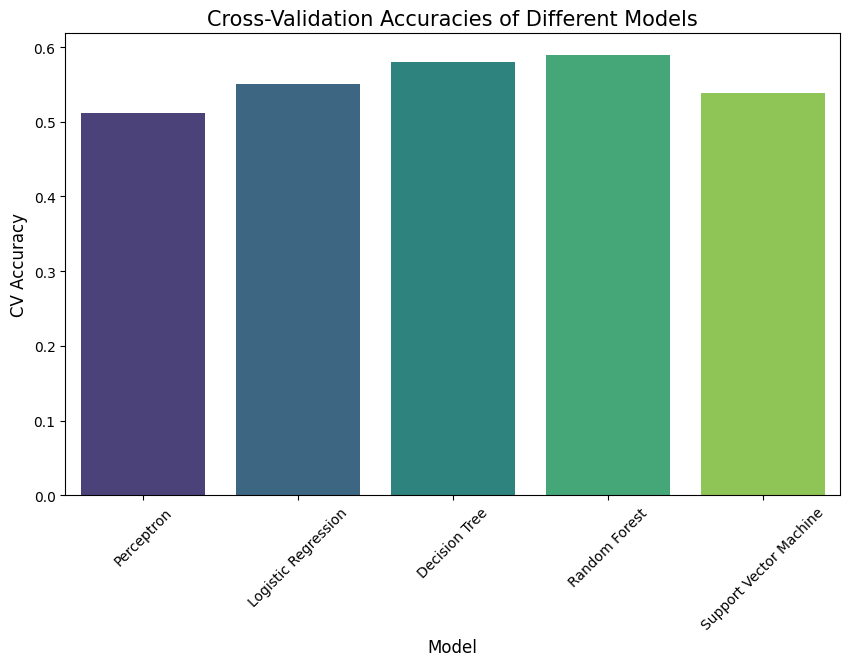

In [34]:
cv_accuracies = []
model_names = ["Perceptron", "Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine"]

# Calculating CV accuracies for each model
for model in models:
    cv_accuracy = evaluate_model_with_cv(model, X_train_scaled, y_train, cv=5)
    cv_accuracies.append(cv_accuracy)

# Creating a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=cv_accuracies, palette="viridis")

# Adding title and labels
plt.title('Cross-Validation Accuracies of Different Models', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('CV Accuracy', fontsize=12)
plt.xticks(rotation=45)  # Rotates the model names for better readability

# Show the plot
plt.show()

### Model Cross-Validation Accuracies

Here are the cross-validation accuracies for the different models:

- Perceptron CV accuracy: 0.51
- Logistic Regression CV accuracy: 0.55
- Decision Tree CV accuracy: 0.58
- Random Forest CV accuracy: 0.59
- Support Vector Machine CV accuracy: 0.54

It's evident that the Random Forest model achieved the highest cross-validation accuracy (0.59) among all the models we evaluated.

### Next Steps

Given that the Random Forest model demonstrated the highest cross-validation accuracy, we will proceed by performing hyperparameter testing and tuning for the Random Forest classifier. Hyperparameter tuning can further enhance the model's performance and generalization. We'll explore different hyperparameter settings to find the optimal configuration for our Random Forest model.



### 5. Model Tuning and Refinement

**Define the Parameter Grid for Random Forest**

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

**Hyperparameter Tuning with GridSearchCV**

In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=1)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

**Best Parameters Found:**
- `max_depth`: 8
- `max_features`: 'sqrt'
- `min_samples_leaf`: 1
- `min_samples_split`: 2
- `n_estimators`: 200

**Using the Optimized Random Forest Model**

In [35]:
# Initialize the Random Forest classifier with the best parameters
rf_optimized = RandomForestClassifier(
    max_depth=8, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=200, 
    random_state=1
)

# Fit the model to the training data
rf_optimized.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_test = rf_optimized.predict(X_test_scaled)

# Perform cross-validation with the best model
cv_accuracy = cross_val_score(rf_optimized, X_train_scaled, y_train, cv=5)

# Round the cross-validation scores to two decimal places
rounded_cv_accuracy = np.round(cv_accuracy, 2)

# Print the rounded cross-validation scores
print("Cross-Validation Scores:", rounded_cv_accuracy)
print("Mean CV Accuracy:", round(cv_accuracy.mean(), 2))

Cross-Validation Scores: [0.57 0.58 0.6  0.58 0.58]
Mean CV Accuracy: 0.58


### Explanation for Similarity in Optimized and Non-Optimized Models### 
The similarity in performance between the optimized and non-optimized Random Forest models can be attributed to several factors:

1. Default Hyperparameters: The Random Forest algorithm often comes with sensible default hyperparameter values that are suitable for a wide range of datasets. In our case, these defaults were already effective.
2. Dataset Complexity: The dataset we used may not have been complex enough to significantly benefit from hyperparameter optimization. When datasets are relatively simple or the default hyperparameters are already well-suited, fine-tuning may not lead to substantial improvements.
3. Limited Hyperparameter Space: The hyperparameter grid we defined for optimization might not have explored a wide enough range of hyperparameters to yield noticeable differences. Expanding the hyperparameter search space might reveal more opportunities for improvement.
4. Data Size: The size of the dataset can also impact the effectiveness of hyperparameter tuning. In cases with smaller datasets, there may be limited room for optimization.

In summary, while hyperparameter optimization is a valuable technique for improving model performance, its impact depends on the specific dataset and problem. In this project, the Random Forest model performed well with default settings, leading to a situation where fine-tuning did not result in a substantial difference in accuracy. Nonetheless, it's essential to consider hyperparameter optimization as a standard practice in machine learning projects to ensure the best model performance, especially for more complex datasets.

--- 

### Conclusion

In this project, we embarked on a journey to predict credit card payment defaults using various supervised machine learning algorithms. After data cleaning, feature transformation, and dataset splitting, we evaluated several classifiers, including:

- Perceptron
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine

Using cross-validation, we assessed the performance of these models.

Our findings revealed that the Random Forest model achieved the highest cross-validation accuracy of approximately 58%. Recognizing this, we decided to further fine-tune the Random Forest model through hyperparameter optimization. Surprisingly, the optimized model took different hyperparameters compared to the default Random Forest model. This suggests that there was room for improvement through hyperparameter tuning, even though the cross-validation accuracy remained at approximately 58%.

The similarity in cross-validation accuracy between the optimized and non-optimized models suggests that the default settings of the Random Forest algorithm were already well-suited for our dataset. This finding underscores the importance of both choosing appropriate algorithms and considering the need for hyperparameter optimization in machine learning projects.

In summary, while hyperparameter optimization didn't significantly alter the model's accuracy in this case, it serves as a valuable technique for improving performance when default settings are not as effective. This project provides insights into credit default prediction, showcasing the Random Forest algorithm as a strong candidate for such tasks.

--- 